<font size=6><b> Lec01. 딥러닝 기초

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [8]:
df = pd.read_csv("../ML/datasets/iris.csv")
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
from sklearn.model_selection import train_test_split

In [27]:
y = df['target']
X = df.drop(['target'], axis=1)

## sparse_categorical_crossentropy
* target값이 int인 경우 : sparse_categorical_crossentropy

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=11, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape
print(y_train[:5])

8      0
23     0
101    2
49     0
111    2
Name: target, dtype: int64


## categorical_crossentropy
* target값이 categorical(one-hot)인 경우 : categorical_crossentropy

In [29]:
yc = pd.get_dummies(y)
print(yc[:5])

from keras.utils import to_categorical
yc2 = to_categorical(y, num_classes=3, dtype='int')
print(yc2[:5])


   0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [30]:
X_train,X_test, y_train, y_test = train_test_split(X, yc , test_size=0.2, random_state=11, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape
print(y_train[:5])
X_train.shape,X_test.shape, y_train.shape, y_test.shape

     0  1  2
8    1  0  0
23   1  0  0
101  0  0  1
49   1  0  0
111  0  0  1


((120, 4), (30, 4), (120, 3), (30, 3))

In [31]:
X_train.head()

,sl,sw,pl,pw
8,4.4,2.9,1.4,0.2
23,5.1,3.3,1.7,0.5
101,5.8,2.7,5.1,1.9
49,5.0,3.3,1.4,0.2
111,6.4,2.7,5.3,1.9


In [33]:
y_train.head()

,0,1,2
8,1,0,0
23,1,0,0
101,0,0,1
49,1,0,0
111,0,0,1


In [ ]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

* kernel_initializer
    * https://www.kaggle.com/code/sauravjoshi23/weight-initialization-methods-keras

In [47]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=6,  activation='relu'))              #히든레이어
model.add(Dense(units=6,  activation='relu'))              #히든레이어
model.add(Dense(units=3,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                50        
                                                                 
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [50]:
fit_hisroty = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print(fit_hisroty)
# pred = model.predict(X_test)


Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 1.1346 - accuracy: 0.6667 - val_loss: 1.1157 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1176 - accuracy: 0.6667 - val_loss: 1.1030 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1031 - accuracy: 0.6667 - val_loss: 1.0939 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0937 - accuracy: 0.6667 - val_loss: 1.0863 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0866 - accuracy: 0.6667 - val_loss: 1.0802 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0800 - accuracy: 0.6667 - val_loss: 1.0757 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0757 - accuracy: 0.6667 - val_loss: 1.0719 - val_accuracy: 0.6667
Epoch 8/100
4/4 [===

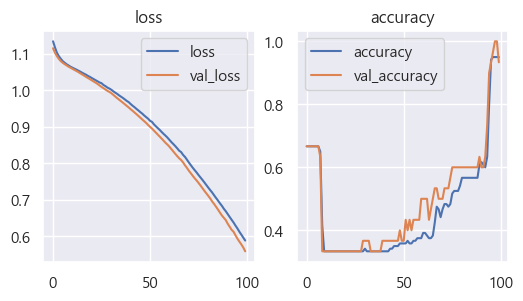

In [52]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

In [53]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.5586 - accuracy: 0.9333


[0.5586135387420654, 0.9333333373069763]

In [67]:
proba = model.predict(X_test)
print(f"proba : {proba[:5]}")

pred = np.argmax(proba, axis=1)
print(f"pred : {pred[:5]}")  #------------submit에 제출할 예측답안


#----------------------- 이런코딩 없다.. 그냥 해보자-----------------
y_test22 = np.argmax(y_test.values, axis=1)
print(f"y_test : {y_test22[:5]}")

from sklearn.metrics import f1_score, confusion_matrix
print( confusion_matrix(y_test22, pred) )

1/1 [==============================] - 0s 26ms/step
proba : [[0.10726831 0.43371287 0.45901874]
 [0.510351   0.44782868 0.04182033]
 [0.2097315  0.544798   0.2454704 ]
 [0.01949558 0.1612339  0.8192705 ]
 [0.03595537 0.24262553 0.7214191 ]]
pred : [2 0 1 2 2]
y_test : [1 0 1 2 2]
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
